## Formación del sistema de ecuaciones

Como recuerda, su tarea básicamente consistió en encontrar el sistema de ecuaciones proveniente de la discretización de una ecuación de Laplace, con problemas a la frontera de Dirichlet y von Neumann. El siguiente ejemplo es lo mismo, pero en esta ocasión para un sistema bidimensional. 

### Ejemplo 

Para una malla de 5 por 7 resolver la ecuación de Laplace utilizando las condiciones  a la frontera siguiente: en la parte superior, toma los valores
$\{0, 70.7107, 100., 70.7107, 0\}$ y en el resto de bordes es cero. El sistema
de ecuaciones es el siguiente


\begin{align*}
-4 f_{2,2}+f_{2,3}+f_{3,2}=0,\\f_{2,2}-4 f_{2,3}+f_{2,4}+f_{3,3}=0,\\f_{2,3}-4 f_{2,4}+f_{2,5}+f_{3,4}=0,\\f_{2,4}-4
   f_{2,5}+f_{2,6}+f_{3,5}=0,\\f_{2,5}-4 f_{2,6}+f_{3,6}+70.7107=0,\\f_{2,2}-4 f_{3,2}+f_{3,3}+f_{4,2}=0,\\f_{2,3}+f_{3,2}-4
   f_{3,3}+f_{3,4}+f_{4,3}=0,\\f_{2,4}+f_{3,3}-4 f_{3,4}+f_{3,5}+f_{4,4}=0,\\f_{2,5}+f_{3,4}-4 f_{3,5}+f_{3,6}+f_{4,5}=0,\\f_{2,6}+f_{3,5}-4
   f_{3,6}+f_{4,6}+100.=0,\\f_{3,2}-4 f_{4,2}+f_{4,3}=0,\\f_{3,3}+f_{4,2}-4 f_{4,3}+f_{4,4}=0,\\f_{3,4}+f_{4,3}-4 f_{4,4}+f_{4,5}=0,\\f_{3,5}+f_{4,4}-4
   f_{4,5}+f_{4,6}=0,\\f_{3,6}+f_{4,5}-4 f_{4,6}+70.7107=0.
\end{align*}

El sistema de ecuaciones resultante es $A \vec f +\vec b= \vec 0$ con $A$ igual a la siguiente matriz

$$
\left(
\begin{array}{ccccccccccccccc}
 -4. & 1. & 0 & 0 & 0 & 1. & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
 1. & -4. & 1. & 0 & 0 & 0 & 1. & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
 0 & 1. & -4. & 1. & 0 & 0 & 0 & 1. & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
 0 & 0 & 1. & -4. & 1. & 0 & 0 & 0 & 1. & 0 & 0 & 0 & 0 & 0 & 0 \\
 0 & 0 & 0 & 1. & -4. & 0 & 0 & 0 & 0 & 1. & 0 & 0 & 0 & 0 & 0 \\
 1. & 0 & 0 & 0 & 0 & -4. & 1. & 0 & 0 & 0 & 1. & 0 & 0 & 0 & 0 \\
 0 & 1. & 0 & 0 & 0 & 1. & -4. & 1. & 0 & 0 & 0 & 1. & 0 & 0 & 0 \\
 0 & 0 & 1. & 0 & 0 & 0 & 1. & -4. & 1. & 0 & 0 & 0 & 1. & 0 & 0 \\
 0 & 0 & 0 & 1. & 0 & 0 & 0 & 1. & -4. & 1. & 0 & 0 & 0 & 1. & 0 \\
 0 & 0 & 0 & 0 & 1. & 0 & 0 & 0 & 1. & -4. & 0 & 0 & 0 & 0 & 1. \\
 0 & 0 & 0 & 0 & 0 & 1. & 0 & 0 & 0 & 0 & -4. & 1. & 0 & 0 & 0 \\
 0 & 0 & 0 & 0 & 0 & 0 & 1. & 0 & 0 & 0 & 1. & -4. & 1. & 0 & 0 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1. & 0 & 0 & 0 & 1. & -4. & 1. & 0 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1. & 0 & 0 & 0 & 1. & -4. & 1. \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1. & 0 & 0 & 0 & 1. & -4. \\
\end{array}
\right)
$$
y $b$ de la forma

$$
(0.,0.,0.,0.,70.7107,0.,0.,0.,0.,100.,0.,0.,0.,0.,70.7107)^T.
$$

La solución a este sistema es $\vec f=-A^{-1}\vec b$.

__Ejercicio 1:__ Crear una rutina que construya $A$ y $\vec b$ para este sistema. Resuelvalo utilizando la función `inv` y grafique $\vec f$ utilizando la funcion `pcolormesh`. Recuerde que aqui $\vec f$ es un vector, para volverlo de nuevo una matriz con entradas $f_{i,j}$ pueden usar la función `reshape`.

In [1]:
#Escribamos nuestro sistema de ecuaciones dada por la discretización del laplaciano en dos dimensiones:
# Definimos a cada entrada f_i,j como una variable x_k. Además, definimos por un lado las ecuaciones con variables f_k por un vector x y a las condiciones de frontera por otro vector y. Para recuperar la matriz A tomamos y=0 y para recuperar solo las condiciones iniciales, tomamos x=0. 

F(x,y) = [-4*(x[1])+x[2]+x[6],x[1]-4*(x[2])+x[3]+x[7],x[2]-4*(x[3])+x[4]+x[8],x[3]-4*(x[4])+x[5]+x[9],x[4]-4*(x[5])+x[10]+70.7107*(y[1]),x[1]-4*(x[6])+x[7]+x[11],x[2]-4*(x[7])+x[6]+x[8]+x[12],x[3]-4*(x[8])+x[7]+x[9]+x[13],x[4]-4*(x[9])+x[8]+x[10]+x[14],x[5]-4*(x[10])+x[9]+x[15]+100*(y[1]),x[6]-4*(x[11])+x[12],x[7]-4*(x[12])+x[11]+x[13],x[8]-4*(x[13])+x[12]+x[14],x[9]-4*(x[14])+x[13]+x[15],x[10]-4*(x[15])+x[14]+(70.7107)*(y[1])]

F (generic function with 1 method)

In [2]:
function matriz(f,n)
    A = zeros(n,n) # Definimos nuestra matriz que contendrá los coeficientes correspondientes al sistema de ecuaciones.
    y = 0 # Definimos nuestro vector y=0 ya que por el momento no nos interesa las condiciones de frontera.
        
        # Definimos un for para calcular los coeficientes de cada renglón
        for i in 1:n 
            x = zeros(n) # Definimos nuestro vector x como un vector nulo.
            x[i] = 1 # Tomamos la entrada i-ésima como 1. Esto nos regresa el coeficiente de la variable i.

            B = f(x,y)
            A[i,:] = B # Este vector renglón lo insertamos como en renglón i-ésimo de nuestra matriz A.
        end

return A
end

matriz (generic function with 1 method)

In [3]:
A = matriz(F,15)

15×15 Array{Float64,2}:
 -4.0   1.0   0.0   0.0   0.0   1.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  1.0  -4.0   1.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   1.0  -4.0   1.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   1.0  -4.0   1.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   1.0  -4.0   0.0      1.0   0.0   0.0   0.0   0.0   0.0
  1.0   0.0   0.0   0.0   0.0  -4.0  …   0.0   1.0   0.0   0.0   0.0   0.0
  0.0   1.0   0.0   0.0   0.0   1.0      0.0   0.0   1.0   0.0   0.0   0.0
  0.0   0.0   1.0   0.0   0.0   0.0      0.0   0.0   0.0   1.0   0.0   0.0
  0.0   0.0   0.0   1.0   0.0   0.0      1.0   0.0   0.0   0.0   1.0   0.0
  0.0   0.0   0.0   0.0   1.0   0.0     -4.0   0.0   0.0   0.0   0.0   1.0
  0.0   0.0   0.0   0.0   0.0   1.0  …   0.0  -4.0   1.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   1.0  -4.0   1.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   1.0  -4.0   1.0   0.0
 

In [4]:
# Ahora definimos una función para obtener nuestro vector b que define las condiciones iniciales del sistema:

function cond_i(f,n)
    x = zeros(n)
    y = 1
    
    A = f(x,y)
    return A
end

cond_i (generic function with 1 method)

In [5]:
b = cond_i(F,15)

15-element Array{Float64,1}:
   0.0   
   0.0   
   0.0   
   0.0   
  70.7107
   0.0   
   0.0   
   0.0   
   0.0   
 100.0   
   0.0   
   0.0   
   0.0   
   0.0   
  70.7107

In [6]:
f = -inv(A)*b

15-element Array{Float64,1}:
  1.30459
  3.37339
  7.41827
 15.8087 
 33.4596 
  1.84497
  4.77069
 10.491  
 22.3568 
 47.319  
  1.30459
  3.37339
  7.41827
 15.8087 
 33.4596 

In [7]:
M = reshape(f,(5,3))

5×3 Array{Float64,2}:
  1.30459   1.84497   1.30459
  3.37339   4.77069   3.37339
  7.41827  10.491     7.41827
 15.8087   22.3568   15.8087 
 33.4596   47.319    33.4596 

In [8]:
using PyPlot

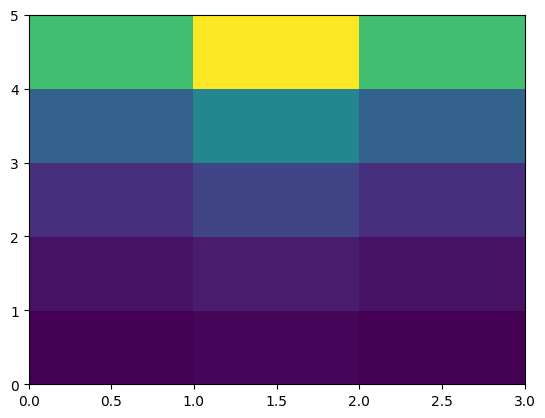

PyObject <matplotlib.collections.QuadMesh object at 0x7faf4eb21210>

In [9]:
pcolormesh(M)

# Solución de la ecuación de calor

# Método de relajación (o iteración)

__ Ejercicio 2:__ Resolver ecuación de Poisson unidimensional con $\rho (x)=\cos(x)$, en el dominio $[0,2 \pi]$, utilizando una malla con 12 puntos. Aquí nuevamente hay 10 incognitas, sin embargo note que para el método es mas conveniente definir $\vec b$ incluyendo las condiciones de frontera.

In [10]:
t = linspace(0,2*pi,12)

12-element LinSpace{Float64}:
 0.0,0.571199,1.1424,1.7136,2.28479,2.85599,…,4.56959,5.14079,5.71199,6.28319

Tenemos que el sistema de ecuaciones de nuestro problema está dado por:

$$ f_3 -2f_2 + f_1 -h^2 \cos(x_2) = 0$$
$$ f_4 -2f_3 + f_2 -h^2 \cos(x_3) = 0$$
$$ f_5 -2f_4 + f_3 -h^2 \cos(x_4) = 0$$
$$ f_6 -2f_5 + f_4 -h^2 \cos(x_5) = 0$$
$$ f_7 -2f_6 + f_5 -h^2 \cos(x_6) = 0$$
$$ f_8 -2f_7 + f_6 -h^2 \cos(x_7) = 0$$
$$ f_9 -2f_8 + f_7 -h^2 \cos(x_8) = 0$$
$$ f_{10} -2f_9 + f_8 -h^2 \cos(x_9) = 0$$
$$ f_{11} -2f_{10} + f_9 -h^2 \cos(x_{10}) = 0$$
$$ f_{12} -2f_{11} + f_{10} -h^2 \cos(x_{11}) = 0$$

donde $h=2\pi/12$ y $f_i=f(x_i)$. Tomemos las condiciones de frontera $f(0)=f_1 = 0$ y $f_{12}=f(2\pi)=0$.

In [17]:
# Escribimos nuestra función que representa nuestro sistema de ecuaciones:

V(x,y) = [x[2]-2*x[1]-((2*pi/12)^2)*cos(t[2])*(y[1]),x[3]-2*x[2]+x[1]-((2*pi/12)^2)*cos(t[3])*(y[1]),x[4]-2*x[3]+x[2]-((2*pi/12)^2)*cos(t[4])*(y[1]),x[5]-2*x[4]+x[3]-((2*pi/12)^2)*cos(t[5])*(y[1]),x[6]-2*x[5]+x[4]-((2*pi/12)^2)*cos(t[6])*(y[1]),x[7]-2*x[6]+x[5]-((2*pi/12)^2)*cos(t[7])*(y[1]),x[8]-2*x[7]+x[6]-((2*pi/12)^2)*cos(t[8])*(y[1]),x[9]-2*x[8]+x[7]-((2*pi/12)^2)*cos(t[9])*(y[1]),x[10]-2*x[9]+x[8]-((2*pi/12)^2)*cos(t[10])*(y[1]),-2*x[10]+x[9]-((2*pi/12)^2)*cos(t[11])*(y[1])]

V (generic function with 1 method)

In [12]:
# Calculamos nuestra matriz 

C = matriz(V,10)

10×10 Array{Float64,2}:
 -2.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  1.0  -2.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   1.0  -2.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   1.0  -2.0   1.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   1.0  -2.0   1.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   1.0  -2.0   1.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   1.0  -2.0   1.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   1.0  -2.0   1.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0  -2.0   1.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0  -2.0

In [18]:
i = cond_i(V,10)

10-element Array{Float64,1}:
 -1.07189  
 -0.113888 
  0.0390164
  0.179534 
  0.26305  
  0.26305  
  0.179534 
  0.0390164
 -0.113888 
 -1.07189  

In [19]:
k = -inv(C)*i

10-element Array{Float64,1}:
 -0.704176
 -0.336463
  0.145137
  0.587721
  0.850772
  0.850772
  0.587721
  0.145137
 -0.336463
 -0.704176

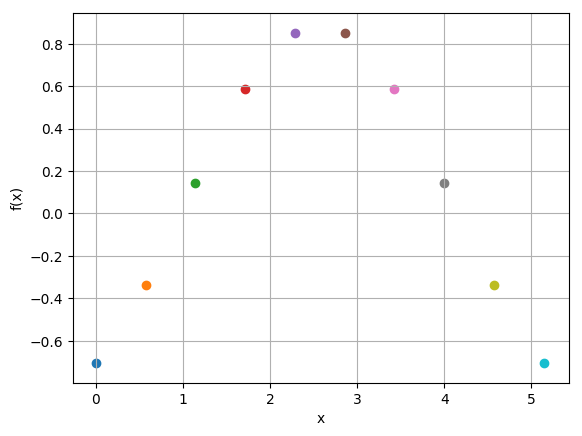

PyObject <matplotlib.text.Text object at 0x7faf4ea52cd0>

In [20]:
for i in 1:10
scatter(t[i],k[i])
end

grid("on")
xlabel("x")
ylabel("f(x)")

__Ejercicio 3:__ Resolver ecuación de calor en una dimensión, en el dominio $[0,1]$, con $f(0)=10$, $f(1)=0$, en una malla con 12 puntos. Aqui obviamente habrá 10 incognitas: $f_1, \dots, f_{10}$. La condición inicial que deberán usar es $\vec f^{[0]}=(5,4,3,2,1,3,5,7,7,8)^{\text{T}}$.
* Utilizando método de Euler.
* Utilizando Runge-Kutta de orden 4.
* Puede hacer este ejercicio construyendo $A$ y $\vec b$, para así utilizar las rutinas que ya tienen de RK4 y Euler, noten que aqui $A\vec f +\vec b$ define la función del sistema dinámico de $n=10$ dimensiones.
* La otra opción es implementar una rutina que aplique el laplaciano discreto a $\vec f$, digamos $\vec r= D_{h_x}[\vec f]$, de esta forma es facil construir la función que define el sistema dinámico en cada paso.
* Graficar en varios tiempos (no en todos en caso de que hagan una partición grande, solo los primeros tiempos y los últimos).

Para resolver esta ecuación, usemos la derivada hacia adelante del tiempo y la segunda derivada central en el espacio. Esto es,

$$ \frac{\partial}{\partial t} u(x_i,t_n) = \frac{u^{n+1}_i - u^n_i}{\Delta t} $$
$$\frac{\partial^2}{\partial x^2} u(x_i,t_n) =\alpha \frac{u^{n}_{i+1} -2 u^n_i + u^n_{i-1}}{\Delta x^2} $$

$$ \Rightarrow \frac{u^{n+1}_i - u^n_i}{\Delta t} = \alpha \frac{u^{n}_{i+1} -2 u^n_i + u^n_{i-1}}{\Delta x^2}$$

Despejando $u^{n+1}_i$, tenemos que:

$$ u^{n+1}_i = u^n_i + \frac{\alpha \Delta t}{\Delta x^2} (u^{n}_{i+1} -2 u^n_i + u^n_{i-1})$$

In [21]:
# Definimos nuestras particiones de valores en x y t:

x1 = linspace(0,1,12)
t1 = linspace(0,1,12)

hx = x1[2]-x1[1]
ht = t1[2]-t1[1]

0.09090909090909091

In [ ]:
K(x) = (1/hx)*[x[1]-2*x[2]+x[3],x[2]-2*x[3]+x[4],x[3]-2*x[4]+x[5],x[4]-2*x[5]+x[6],x[5]-2*x[6]+x[7],x[6]-2*x[7]+x[8],x[7]-2*x[8]+x[9],x[8]-2*x[9]+x[10],x[9]-2*x[10]+x[11]]

In [22]:
# Definimos nuestro vector con condiciones iniciales x0:

x0 = [5,4,3,2,1,3,5,7,7,8]

10-element Array{Int64,1}:
 5
 4
 3
 2
 1
 3
 5
 7
 7
 8

In [ ]:
# Mandamos a llamar la función del método de Euler para una dimensión arbitraria.

function euler(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        x = x + f(x,t)*h
        push!(listx,x) 
     end
     return listx
end

In [ ]:
function runge_kutta_4(f,x0,listt)
    # Definimos una lista arbitraria sin definir los elementos que va a contener
    listx = []
    h = listt[2] - listt[1]
    
    # Condiciones iniciales
    x = x0

    # Introducimos nuestra condición inicial en nuestra lista:
    push!(listx,x)
    
    # Método de Runge-Kutta de orden 4
    for i in 1:length(listt)-1
        
    k1 = f(x, listt[i])
    k2 = f(x + h*(k1)/2, listt[i] + h/2) 
    k3 = f(x + h*(k2)/2, listt[i] + h/2)
    k4 = f(x + h*(k3), listt[i] + h)  
        
    # Sumamos las aportaciones de ki según el método de Runge-Kutta de orden 4
    x = x + h*(k1 + 2*(k2) + 2*(k3) + k4)/6 
    
    # Guardamos los valores de xi en la lista
    push!(listx,x)
    end
    
    return listx
end